In [1]:
import cv2 as cv

In [2]:
!wget 'http://2.bp.blogspot.com/-umDlb5yRys0/T1W21N6NVuI/AAAAAAAAJpY/DpcF0uCqSHE/s1600/a.jpg'

/usr/bin/zsh: /data/envs/dsclass/lib/python3.10/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
wget: /data/envs/dsclass/lib/python3.10/site-packages/cv2/../../../../lib/libuuid.so.1: no version information available (required by wget)
--2022-10-24 20:22:11--  http://2.bp.blogspot.com/-umDlb5yRys0/T1W21N6NVuI/AAAAAAAAJpY/DpcF0uCqSHE/s1600/a.jpg
Resolving 2.bp.blogspot.com (2.bp.blogspot.com)... 2404:6800:4012::2001, 142.251.42.225
Connecting to 2.bp.blogspot.com (2.bp.blogspot.com)|2404:6800:4012::2001|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75971 (74K) [image/jpeg]
Saving to: ‘a.jpg.2’

a.jpg.2             100%[===================>]  74.19K  --.-KB/s    in 0.01s   

2022-10-24 20:22:11 (5.39 MB/s) - ‘a.jpg.2’ saved [75971/75971]



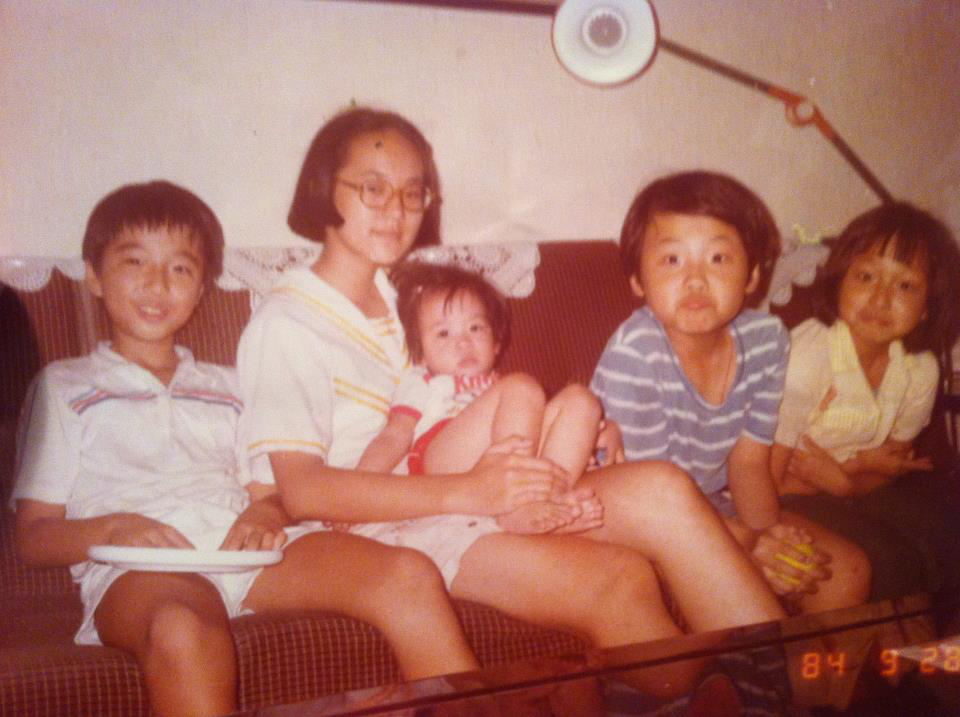

In [3]:
from PIL import Image
a = cv.imread('a.jpg')
a_rgb = cv.cvtColor(a, cv.COLOR_BGR2RGB)
Image.fromarray(a_rgb)

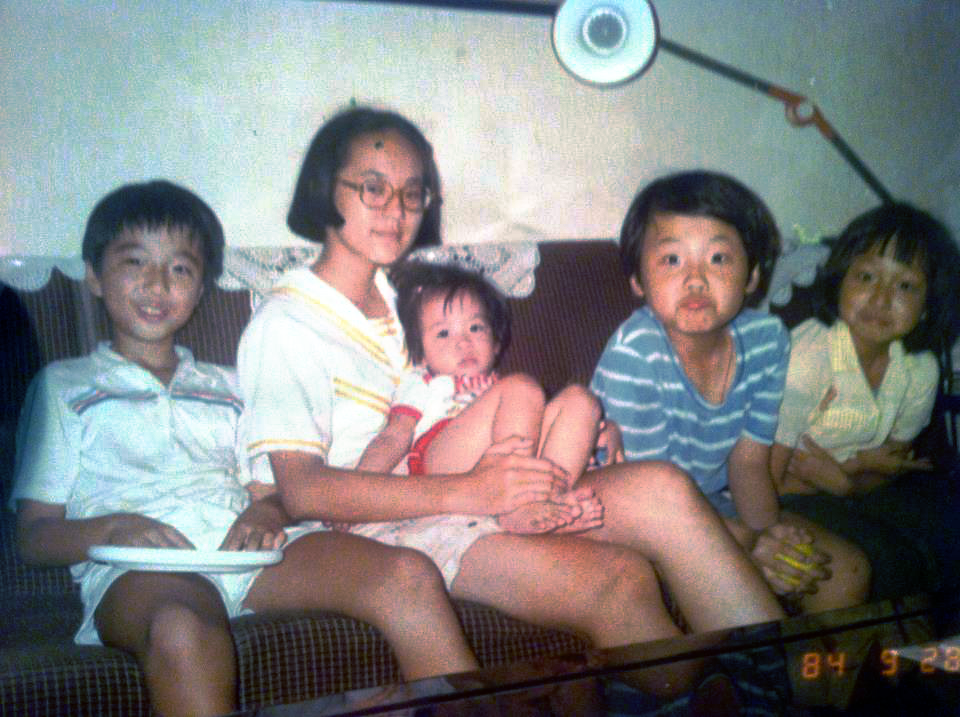

In [4]:
b = a.copy()
for c in range(3):
    b[..., c] = cv.equalizeHist(a[..., c])
Image.fromarray(cv.cvtColor(b, cv.COLOR_BGR2RGB))

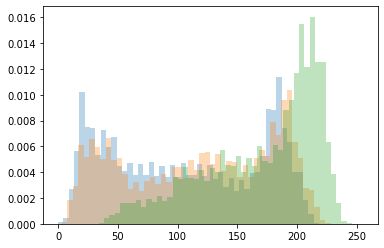

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(3):
    plt.hist(a.reshape(-1, 3)[..., i], alpha=0.3, bins=50, density=True)

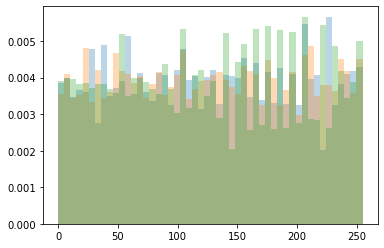

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(3):
    plt.hist(b.reshape(-1, 3)[..., i], alpha=0.3, bins=50, density=True)

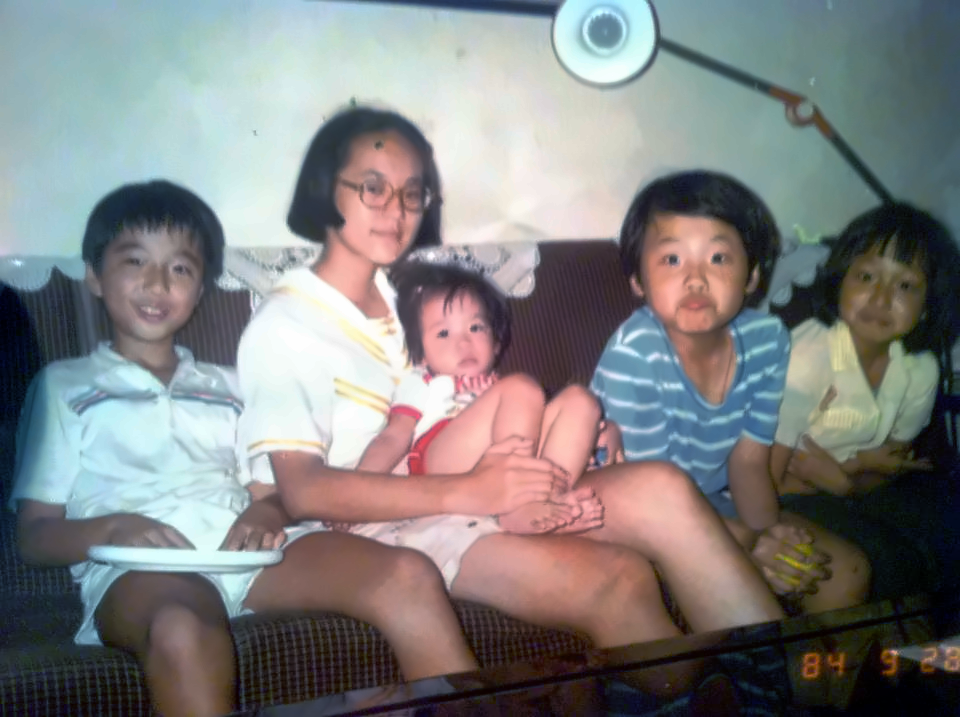

In [25]:
b = a.copy()
for c in range(3):
    b[..., c] = cv.equalizeHist(a[..., c])
b = cv.fastNlMeansDenoisingColored(b, 7) 
Image.fromarray(cv.cvtColor(b, cv.COLOR_BGR2RGB))

[255 161 238] [ 0 71 64]
[230 138 229] [ 13  69 122]


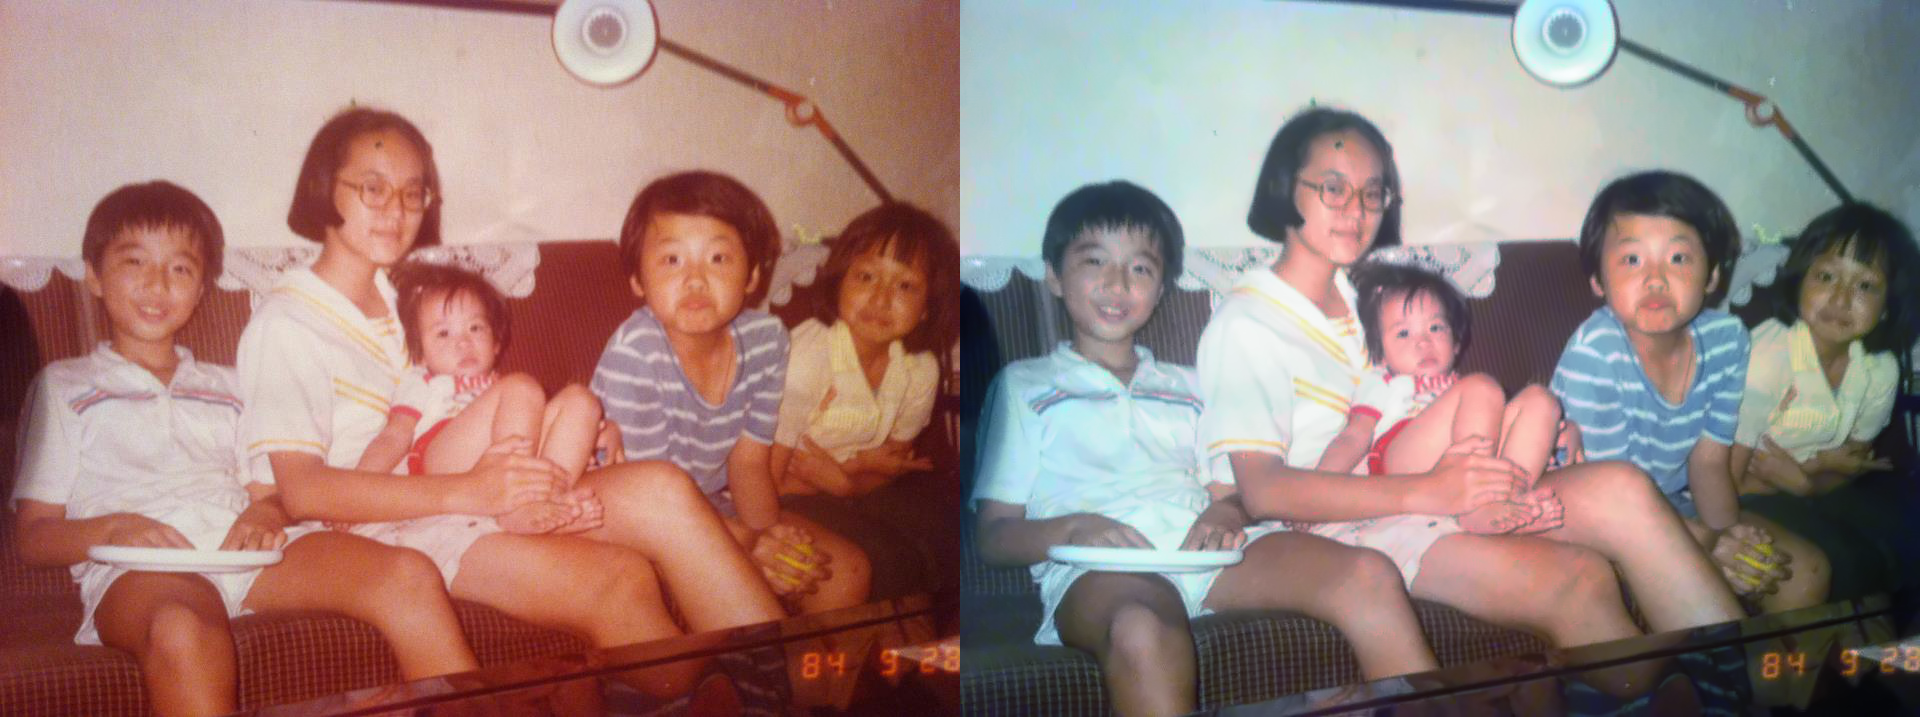

In [26]:
import numpy as np
from IPython.display import display
b = a.copy()
for c in range(3):
    b[..., c] = cv.equalizeHist(a[..., c])
b = cv.cvtColor(b, cv.COLOR_BGR2YUV)
c = cv.cvtColor(a, cv.COLOR_BGR2YUV)

print(b.max(axis=(0,1)), b.min(axis=(0,1)))
print(c.max(axis=(0,1)), c.min(axis=(0,1)))
b[..., 1] = cv.fastNlMeansDenoising(b[..., 1], 13) 
b[..., 2] = cv.fastNlMeansDenoising(b[..., 2], 13) 
b[..., 0] = (c[..., 0]-c[...,0].min())/(c[..., 0].max() - c[..., 0].min())*255
b[..., 0] = cv.fastNlMeansDenoising(b[..., 0], 7) 
show_img = np.concatenate([cv.cvtColor(a, cv.COLOR_BGR2RGB), cv.cvtColor(b, cv.COLOR_YUV2RGB)], axis=1)

Image.fromarray(show_img)

[255 197 188] [ 0 96 92]
[234 191 191] [ 10 120 114]


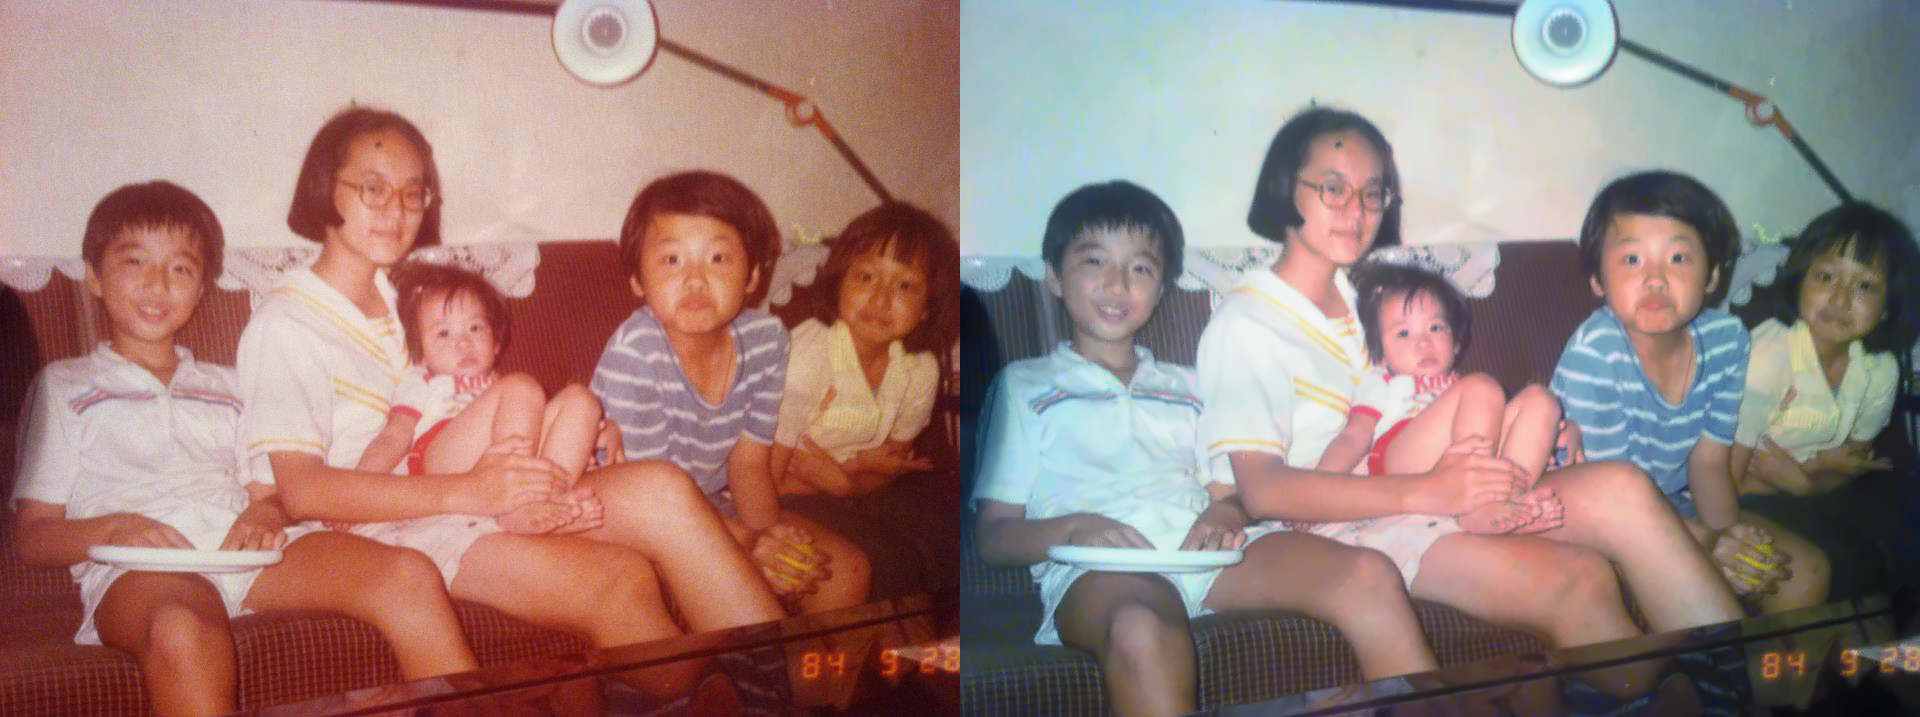

In [27]:
import numpy as np
from IPython.display import display
b = a.copy()
for c in range(3):
    b[..., c] = cv.equalizeHist(a[..., c])
b = cv.cvtColor(b, cv.COLOR_BGR2LAB)
c = cv.cvtColor(a, cv.COLOR_BGR2LAB)

print(b.max(axis=(0,1)), b.min(axis=(0,1)))
print(c.max(axis=(0,1)), c.min(axis=(0,1)))
#b[..., 1] = cv.GaussianBlur(b[..., 1], (17, 17), 13)
b[..., 1] = cv.fastNlMeansDenoising(b[..., 1], 13) 
b[..., 2] = cv.fastNlMeansDenoising(b[..., 2], 13) 

b[..., 0] = (c[..., 0]-c[...,0].min())/(c[..., 0].max() - c[..., 0].min())*255
b[..., 0] = cv.fastNlMeansDenoising(b[..., 0], 7) 


show_img = np.concatenate([cv.cvtColor(a, cv.COLOR_BGR2RGB), cv.cvtColor(b, cv.COLOR_LAB2RGB)], axis=1)
Image.fromarray(show_img)